<a href="https://colab.research.google.com/github/jegun19/scratch_kNN/blob/main/scratch_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook, a KNN model is implemented from scratch and tested using Iris dataset imported from scikit-learn.

In [1]:
# Import packages and the iris dataset from scikit-learn
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
iris_data = iris.data
iris_labels = iris.target

print(iris_data[1], iris_data[51], iris_data[101])
print(iris_labels[1], iris_labels[51], iris_labels[101])

[4.9 3.  1.4 0.2] [6.4 3.2 4.5 1.5] [5.8 2.7 5.1 1.9]
0 1 2


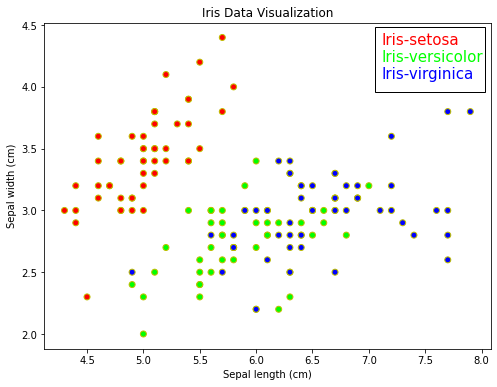

In [2]:
# Visualize sepal length and width features
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X = iris_data 
y = iris_labels

cm_bright = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure(figsize=(8,6))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,
            edgecolor='y')

plt.title('Iris Data Visualization')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')

plt.gcf().patches.extend([plt.Rectangle((0.7,0.72), (0.19), (0.15),
                                        fill = False, color='k',
                                        transform=plt.gcf().transFigure)])

plt.gcf().text(0.71, 0.83, 'Iris-setosa', color='#FF0000', size=15)
plt.gcf().text(0.71, 0.79, 'Iris-versicolor', color='#00FF00', size=15)
plt.gcf().text(0.71, 0.75, 'Iris-virginica', color='#0000FF', size=15)

plt.show()

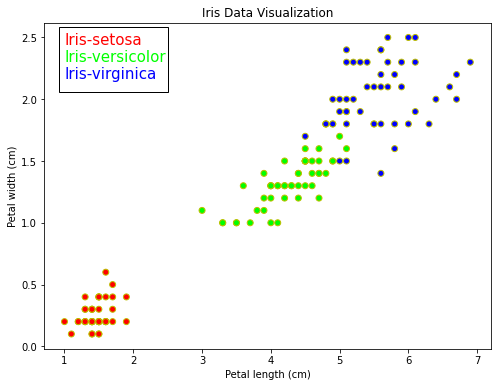

In [3]:
# Visualize petal length and width features
X = iris_data 
y = iris_labels

cm_bright = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure(figsize=(8,6))

plt.scatter(X[:, 2], X[:, 3], c=y, cmap=cm_bright,
            edgecolor='y')

plt.title('Iris Data Visualization')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')

plt.gcf().patches.extend([plt.Rectangle((0.15,0.72), (0.19), (0.15),
                                        fill = False, color='k',
                                        transform=plt.gcf().transFigure)])

plt.gcf().text(0.16, 0.83, 'Iris-setosa', color='#FF0000', size=15)
plt.gcf().text(0.16, 0.79, 'Iris-versicolor', color='#00FF00', size=15)
plt.gcf().text(0.16, 0.75, 'Iris-virginica', color='#0000FF', size=15)

plt.show()

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=.33)
print('X_train', X_train.shape, 'Y_train', Y_train.shape)
print('X_test', X_test.shape, 'Y_test', Y_test.shape)

X_train (100, 4) Y_train (100,)
X_test (50, 4) Y_test (50,)


In [5]:
# Count euclidean distance using np.linalg.norm (L2 norm)
def distance(data1, data2):
   
    data1 = np.array(data1) 
    data2 = np.array(data2)
    
    return np.linalg.norm(data1 - data2)

# Test the distance function for 2 data points
print(iris_data[1])
print(iris_data[51])
print(distance(iris_data[1], iris_data[51]))

[4.9 3.  1.4 0.2]
[6.4 3.2 4.5 1.5]
3.6864617182333523


In [6]:
# Count euclidean distance manually
import math
def euclideanDistance(data1, data2, length):
  distance = 0
  for x in range(length):
    distance += pow((data1[x] - data2[x]), 2)
    
  return math.sqrt(distance)

length = len(iris_data[1])

# Test the distance function for 2 data points (reproduce the results for the previous norm function)
print(iris_data[1])
print(iris_data[51])
print(euclideanDistance(iris_data[1], iris_data[51], length))

[4.9 3.  1.4 0.2]
[6.4 3.2 4.5 1.5]
3.6864617182333523


In [7]:
def get_neighbors(training_set, 
                  labels, 
                  test_instance, 
                  k, 
                  distance):
    distances = []
    
    # Count the distance between the test instances and each data point in the training set
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))

    # Sort the neighbors by its distance metrics
    distances.sort(key=lambda x: x[1])

    # Select only the nearest k neighbors
    neighbors = distances[:k]

    return neighbors

In [8]:
# Create voting function to vote the nearest neighbor
from collections import Counter
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1

    vote_result = class_counter.most_common(1)[0][0]
    return vote_result

In [9]:
# Define the number of samples in the test data
n_samples = len(X_test)

# Define the number of nearest neighbor
n_neighbor = 3

In [10]:
# Predict the label of each sample in test data
def predict(n_samples):
  Y_pred = list()
  for i in range(n_samples):

      neighbors = get_neighbors(X_train, 
                                Y_train, 
                                X_test[i], 
                                n_neighbor, 
                                distance=distance)

      print("index: ", i, 
            ", prediction: ", vote(neighbors), 
            ", label: ", Y_test[i]
            )
      Y_pred.append(vote(neighbors))

  return Y_pred

Y_pred = predict(n_samples)

index:  0 , prediction:  2 , label:  2
index:  1 , prediction:  1 , label:  1
index:  2 , prediction:  1 , label:  1
index:  3 , prediction:  0 , label:  0
index:  4 , prediction:  2 , label:  2
index:  5 , prediction:  2 , label:  2
index:  6 , prediction:  2 , label:  2
index:  7 , prediction:  1 , label:  1
index:  8 , prediction:  0 , label:  0
index:  9 , prediction:  0 , label:  0
index:  10 , prediction:  1 , label:  1
index:  11 , prediction:  2 , label:  2
index:  12 , prediction:  2 , label:  1
index:  13 , prediction:  1 , label:  1
index:  14 , prediction:  0 , label:  0
index:  15 , prediction:  2 , label:  2
index:  16 , prediction:  1 , label:  1
index:  17 , prediction:  1 , label:  1
index:  18 , prediction:  1 , label:  1
index:  19 , prediction:  2 , label:  2
index:  20 , prediction:  1 , label:  1
index:  21 , prediction:  0 , label:  0
index:  22 , prediction:  1 , label:  2
index:  23 , prediction:  2 , label:  2
index:  24 , prediction:  2 , label:  2
index:  25

[[15  0  0]
 [ 0 15  1]
 [ 0  1 18]]


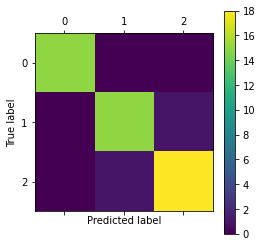

In [11]:
# Draw confusion matrix from the prediction result and the actual label
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_pred, Y_test)
print(cm)

plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Next, we will use KNN model imported from scikit-learn to compare our model with.

In [12]:
# Use KNN from scikit-learn to compare the prediction results
from sklearn.neighbors import KNeighborsClassifier

# Call the KNN model
sk_knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model with training data
sk_knn.fit(X_train, Y_train)

# Predict the testing data
sk_Y_pred = sk_knn.predict(X_test)

[[15  0  0]
 [ 0 15  1]
 [ 0  1 18]]


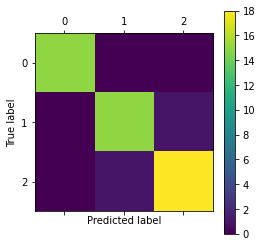

In [13]:
# Draw confusion matrix of the prediction results using KNN from scikit-learn
sk_cm = confusion_matrix(sk_Y_pred, Y_test)
print(sk_cm)

plt.matshow(sk_cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# By seeing the confusion matrix from both self-implemented model and the model imported from scikit-learn, we have successfully implemented a KNN model from scratch!